# ML Textual model Feature Engineering

In [77]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import itertools

# Importing libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

### Reading CSV file using pandas dataframe

In [79]:
dataset = pd.read_csv("patient data all 119.csv")
df_clean = dataset.drop(columns=["seq_id", "patient_id", "date" , "cough_filename", "finger_filename",
                                "patient_smartphone", "breathing_filename"])
df_clean.head()

,corona_test,age,gender,medical_history,smoker,patient_reported_symptoms
0,negative,32,male,NaN,NaN,"Fever, chills, or sweating,"
1,negative,31,male,NaN,NaN,"Fever, chills, or sweating,Shortness of breath..."
2,negative,21,female,NaN,NaN,"New or worsening cough,"
3,negative,33,male,"Asthma or chronic lung disease,",NaN,"Fever, chills, or sweating,Shortness of breath..."
4,negative,27,male,Disease or conditions that make it harder to c...,NaN,"New or worsening cough,"


### Counting number of nan values in each feature

In [80]:
ff = df_clean["medical_history"].isna().sum()
print(ff)

# Filling nan values with None.
df_clean["medical_history"].fillna("None,", inplace = True) 
df_clean["smoker"].fillna("no", inplace = True) 
df_clean["patient_reported_symptoms"].fillna("None,", inplace = True) 

3


In [81]:
df_clean.head()

,corona_test,age,gender,medical_history,smoker,patient_reported_symptoms
0,negative,32,male,"None,",no,"Fever, chills, or sweating,"
1,negative,31,male,"None,",no,"Fever, chills, or sweating,Shortness of breath..."
2,negative,21,female,"None,",no,"New or worsening cough,"
3,negative,33,male,"Asthma or chronic lung disease,",no,"Fever, chills, or sweating,Shortness of breath..."
4,negative,27,male,Disease or conditions that make it harder to c...,no,"New or worsening cough,"


In [82]:
# In order to see how many unique values are there in my column
df_clean["medical_history"].describe()

count       118
unique        9
top       None,
freq         84
Name: medical_history, dtype: object

### Histogram

<Figure size 432x288 with 0 Axes>

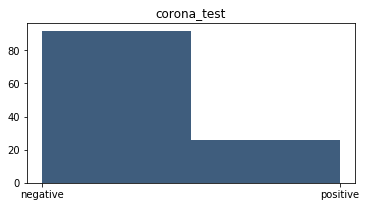

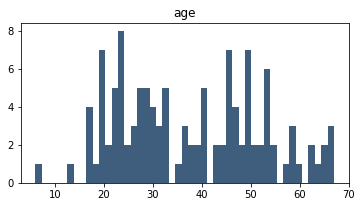

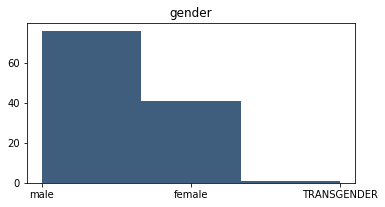

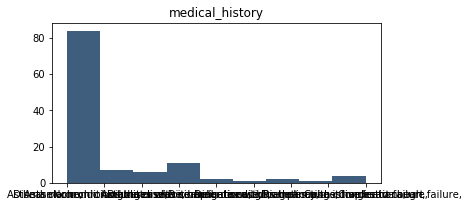

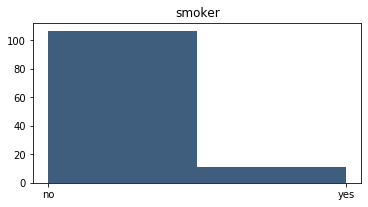

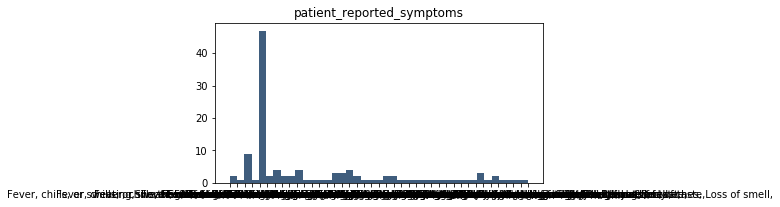

In [83]:
plt.suptitle("Histogram of Numerical Columns", fontsize = 20)
for i in range(1, df_clean.shape[1]+ 1): 
    plt.figure(figsize=(20,10))
    plt.subplot(3, 3, i)
    f = plt.gca()
    f.set_title(df_clean.columns.values[i - 1])
    vals = np.size(df_clean.iloc[:, i - 1].unique())
    plt.hist(df_clean.iloc[:, i - 1], bins = vals, color = "#3F5D7D")

# Correlation

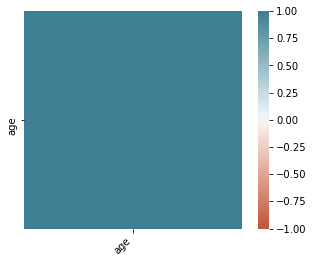

In [84]:
# TODO: Not working properly

# df_clean.corrwith(df_clean.corona_test).plot.bar(figsize = (20, 10),
#                                                 title= "Correlation With Responsive Variable", 
#                                                 fontsize = 15, rot = 45,
#                                                 grid = True)
corr = df_clean.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [85]:
# For checking the data type of all the features
df_clean.dtypes

corona_test                  object
age                           int64
gender                       object
medical_history              object
smoker                       object
patient_reported_symptoms    object
dtype: object

In [86]:
# For checking how many unique rows in medical history.
df_clean["medical_history"].unique()

array(['None,', 'Asthma or chronic lung disease,',
       'Disease or conditions that make it harder to cough,',
       'Diabetes with complications,',
       'Asthma or chronic lung disease,Disease or conditions that make it harder to cough,',
       'Asthma or chronic lung disease,Diabetes with complications,',
       'Pregnancy,',
       'Diabetes with complications,Congestive heart failure,',
       'Congestive heart failure,'], dtype=object)

### reading csv containing important medical history diseases

In [87]:
top_medical_history = pd.read_csv("medical_history.csv").medical_history.values
top_medical_history

array(['None,', 'Asthma or chronic lung disease,',
       'Disease or conditions that make it harder to cough,',
       'Diabetes with complications,', 'Pregnancy,',
       'Congestive heart failure,', 'Extreme obesity'], dtype=object)

### doing feature engineering on medical history

In [88]:
df2 = df_clean.copy()
for mh in top_medical_history:
    df2[mh] = df2.medical_history.str.contains(mh).astype(int)
    df2["medical_history"] = df2.medical_history.str.replace(mh+ ",", "")

df2["total_diseases"] = df2.medical_history.str.count(",")
df2 = df2.drop(columns = ["medical_history", "patient_reported_symptoms"])
df2

,corona_test,age,gender,smoker,"None,","Asthma or chronic lung disease,","Disease or conditions that make it harder to cough,","Diabetes with complications,","Pregnancy,","Congestive heart failure,",Extreme obesity,total_diseases
0,negative,32,male,no,1,0,0,0,0,0,0,1
1,negative,31,male,no,1,0,0,0,0,0,0,1
2,negative,21,female,no,1,0,0,0,0,0,0,1
3,negative,33,male,no,0,1,0,0,0,0,0,1
4,negative,27,male,no,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
113,positive,50,male,no,1,0,0,0,0,0,0,1
114,negative,26,male,no,1,0,0,0,0,0,0,1
115,negative,50,male,yes,1,0,0,0,0,0,0,1
116,negative,44,male,no,1,0,0,0,0,0,0,1


# Doing feature engineering on reported Symptoms

In [89]:
# For checking how many unique rows in patient_reported_symptoms.
# df_clean["patient_reported_symptoms"].unique()

In [90]:
# reading csv_file of patient recorded symptoms
top_symptoms = pd.read_csv("patient_reported_symptoms.csv").patient_reported_symptoms.values
top_symptoms

array(['Fever,', 'chills,', 'or sweating,', 'Shortness of breath',
       'Loss of taste,', 'Loss of smell,', 'New or worsening cough,',
       'Sore throat,', 'Body aches,', 'None,'], dtype=object)

#### Breaking every symptom into a feature

In [91]:
df3 = df_clean.copy()
for ps in top_symptoms:
    df3[ps] = df_clean.patient_reported_symptoms.str.contains(ps).astype(int)
    df3["patient_reported_symptoms"] = df_clean.patient_reported_symptoms.str.replace(ps+ ",", "")

df3["total symptoms"] = df_clean.patient_reported_symptoms.str.count(",")
df3 = df3.drop(columns = ["patient_reported_symptoms", "medical_history", "corona_test", "age", "gender", "smoker"])

df3.rename(columns={'None,':'Nothing'}, 
                 inplace=True)
df3

,"Fever,","chills,","or sweating,",Shortness of breath,"Loss of taste,","Loss of smell,","New or worsening cough,","Sore throat,","Body aches,",Nothing,total symptoms
0,1,1,1,0,0,0,0,0,0,0,3
1,1,1,1,1,1,1,0,0,0,0,6
2,0,0,0,0,0,0,1,0,0,0,1
3,1,1,1,1,1,1,1,0,0,0,7
4,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
113,0,0,0,0,0,0,0,0,0,1,1
114,0,0,0,1,1,0,1,1,1,0,5
115,0,0,0,0,0,0,1,1,0,0,2
116,0,0,0,1,0,0,1,1,1,0,4


##### Here we are merging the dataframes based on these features

In [92]:
df4 = pd.concat([df2, df3], axis=1, ignore_index=False)
# here you can drop total symptoms and total diseases column as well, in order to make your algo more robust
df4 = df4.drop(columns = ["total_diseases", "total symptoms"])
df4

,corona_test,age,gender,smoker,"None,","Asthma or chronic lung disease,","Disease or conditions that make it harder to cough,","Diabetes with complications,","Pregnancy,","Congestive heart failure,",...,"Fever,","chills,","or sweating,",Shortness of breath,"Loss of taste,","Loss of smell,","New or worsening cough,","Sore throat,","Body aches,",Nothing
0,negative,32,male,no,1,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
1,negative,31,male,no,1,0,0,0,0,0,...,1,1,1,1,1,1,0,0,0,0
2,negative,21,female,no,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,negative,33,male,no,0,1,0,0,0,0,...,1,1,1,1,1,1,1,0,0,0
4,negative,27,male,no,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,positive,50,male,no,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
114,negative,26,male,no,1,0,0,0,0,0,...,0,0,0,1,1,0,1,1,1,0
115,negative,50,male,yes,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
116,negative,44,male,no,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,1,0


In [93]:
# for visualizing statistical detail of dataframe.
df4.describe()

,age,"None,","Asthma or chronic lung disease,","Disease or conditions that make it harder to cough,","Diabetes with complications,","Pregnancy,","Congestive heart failure,",Extreme obesity,"Fever,","chills,","or sweating,",Shortness of breath,"Loss of taste,","Loss of smell,","New or worsening cough,","Sore throat,","Body aches,",Nothing
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.0,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,37.677966,0.711864,0.084746,0.067797,0.110169,0.016949,0.042373,0.0,0.245763,0.245763,0.245763,0.313559,0.177966,0.084746,0.381356,0.296610,0.110169,0.398305
std,14.503687,0.454826,0.279691,0.252469,0.314436,0.129631,0.202297,0.0,0.432374,0.432374,0.432374,0.465918,0.384115,0.279691,0.487791,0.458711,0.314436,0.491637
min,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,50.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,67.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
df4.dtypes

corona_test                                            object
age                                                     int64
gender                                                 object
smoker                                                 object
None,                                                   int64
Asthma or chronic lung disease,                         int64
Disease or conditions that make it harder to cough,     int64
Diabetes with complications,                            int64
Pregnancy,                                              int64
Congestive heart failure,                               int64
Extreme obesity                                         int64
Fever,                                                  int64
chills,                                                 int64
or sweating,                                            int64
Shortness of breath                                     int64
Loss of taste,                                          int64
Loss of 

In [95]:
# for checking total no of nan values in dataset.
df4.isna().sum()

corona_test                                            0
age                                                    0
gender                                                 0
smoker                                                 0
None,                                                  0
Asthma or chronic lung disease,                        0
Disease or conditions that make it harder to cough,    0
Diabetes with complications,                           0
Pregnancy,                                             0
Congestive heart failure,                              0
Extreme obesity                                        0
Fever,                                                 0
chills,                                                0
or sweating,                                           0
Shortness of breath                                    0
Loss of taste,                                         0
Loss of smell,                                         0
New or worsening cough,        

### For checking class distribution

negative    92
positive    26
Name: corona_test, dtype: int64


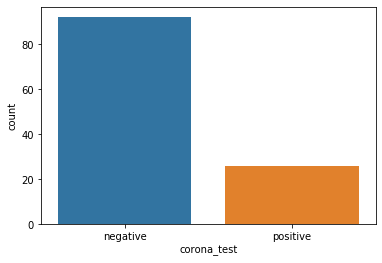

In [96]:
ax = sns.countplot(x = "corona_test", data = df4)
print(df4["corona_test"].value_counts())

pos = df4["corona_test"].value_counts()[0]
neg = df4["corona_test"].value_counts()[1]

### For checking contribution from each class in terms of percentage. 

In [97]:
neg_per = 100 *(pos / float(df4.shape[0]))
pos_per = 100 *(neg / float(df4.shape[0]))
print(neg_per)
print(pos_per)

77.96610169491525
22.033898305084744


In [98]:
# For checking distribution of values in each column or in each feature.. 

unique = df4["age"].value_counts()
print("Number of unique age values :", unique.shape[0])
# the top 10 ages that were repeated again and again
print(unique.head(10))

Number of unique age values : 47
20    6
50    6
24    5
29    5
46    5
22    5
40    5
30    4
17    4
47    4
Name: age, dtype: int64


In [99]:
# For checking distribution of values in each column or in each feature..  (checking distribution of age)

unique = df4["gender"].value_counts()
print("Number of unique age values :", unique.shape[0])
# the top 10 ages that were repeated again and again
print(unique.head(10))

Number of unique age values : 3
male           76
female         41
TRANSGENDER     1
Name: gender, dtype: int64


In [100]:
# For checking distribution of values in each column or in each feature..  (checking distribution of )
unique = df4["smoker"].value_counts()
print("Number of unique age values :", unique.shape[0])
# the top 10 ages that were repeated again and again
print(unique.head(10))

Number of unique age values : 2
no     107
yes     11
Name: smoker, dtype: int64


In [101]:
# In order to convert textural data into a numerical number for machine learning, we will use One hot encoding. 
# in pandas we have get_dummies function to convert textual data into seperate features like one hot encoder

In [102]:
gender = pd.get_dummies(df4['gender'])
smoker = pd.get_dummies(df4['smoker'], prefix='smoker')

In [103]:
# so here we are merging dataframes together
df5 = pd.concat([gender, smoker, df4], axis=1, ignore_index=False)
df5 = df5.drop(columns = ["gender", "smoker"])
df5 = df5.replace(to_replace ="negative", 
                 value =0)
df5 = df5.replace(to_replace ="positive", 
                 value =1)
# df5[df5["corona_test"] == "negative"] = 0
# df5[df5["corona_test"] == "positive"] = 1

target_labels = df5["corona_test"] 
df5 = df5.drop(columns = ["corona_test"])
df5

,TRANSGENDER,female,male,smoker_no,smoker_yes,age,"None,","Asthma or chronic lung disease,","Disease or conditions that make it harder to cough,","Diabetes with complications,",...,"Fever,","chills,","or sweating,",Shortness of breath,"Loss of taste,","Loss of smell,","New or worsening cough,","Sore throat,","Body aches,",Nothing
0,0,0,1,1,0,32,1,0,0,0,...,1,1,1,0,0,0,0,0,0,0
1,0,0,1,1,0,31,1,0,0,0,...,1,1,1,1,1,1,0,0,0,0
2,0,1,0,1,0,21,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,1,0,33,0,1,0,0,...,1,1,1,1,1,1,1,0,0,0
4,0,0,1,1,0,27,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,0,0,1,1,0,50,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
114,0,0,1,1,0,26,1,0,0,0,...,0,0,0,1,1,0,1,1,1,0
115,0,0,1,0,1,50,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
116,0,0,1,1,0,44,1,0,0,0,...,0,0,0,1,0,0,1,1,1,0


In [104]:
# Let's try SMOTE for balancing data 
# but we will just apply smote on training data
# blc testing data will remain original, no duplication in testing data. 
# so spliting the dataset

In [105]:
X_train, X_test, y_train, y_test = train_test_split(df5, target_labels, test_size=0.30, random_state=20, shuffle=True)

### Applying SMOTE

In [106]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=0)

X_train_smote , y_train_smote = smote.fit_sample(X_train.astype("int"), y_train.astype("int"))

print("Before Smote: ", Counter(y_train))
print("After Smote: ", Counter(y_train_smote))

# so as you can say from the results that before smoting we had only 20 samples from class 1
# and we had 74 samples from class 0 so we performed smote to make them equal. 

Before Smote:  Counter({0: 65, 1: 17})
After Smote:  Counter({0: 65, 1: 65})


# Now building the model

In [107]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Normalising train and test data
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train_smote)
X_test_scaled = min_max_scaler.fit_transform(X_test)

model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train_scaled, y_train_smote)

y_pred = model.predict(X_test_scaled)

In [108]:
y_test = np.array(y_test).astype("int")
print("Testing accuracy is: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
pd.crosstab(y_test, y_pred)

Testing accuracy is:  0.75
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.50      0.44      0.47         9

    accuracy                           0.75        36
   macro avg       0.66      0.65      0.65        36
weighted avg       0.74      0.75      0.74        36



col_0,0,1
row_0,,
0,23,4
1,5,4



ROC curve value is:  0.6502057613168724
Confusion matrix, without normalization
[[23  4]
 [ 5  4]]


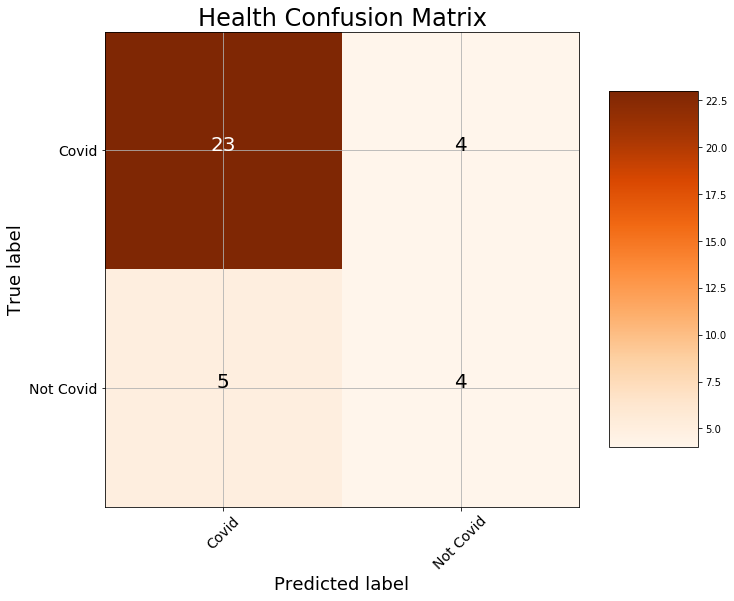

In [109]:
# Probabilities for each class
rf_probs = model.predict_proba(X_test_scaled)[:, 1]

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)
print()
print("ROC curve value is: ", roc_value)

# Plotting confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Covid', 'Not Covid'],
                      title = 'Health Confusion Matrix')

plt.savefig('text-cmat.png')

In [110]:
# calculate roc curve
ns_probs = [0 for _ in range(len(y_test))]

fpr, tpr, thresholds = roc_curve(y_test, rf_probs)

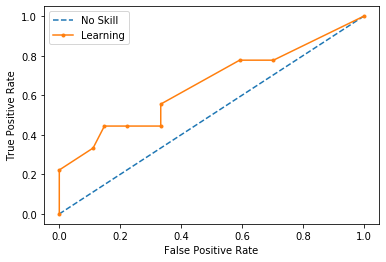

In [111]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, rf_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Learning')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()

### Now down here I m gonna use XGBoost
### along with RandomizedSearchCV for hyperparamter tuning

In [112]:
X_train, X_test, y_train, y_test = train_test_split(df5, target_labels, test_size=0.30, random_state=20, shuffle=True)

# doing oversampling on train data
X_train_smote , y_train_smote = smote.fit_sample(X_train.astype("int"), y_train.astype("int"))
print("Before Smote: ", Counter(y_train))
print("After Smote: ", Counter(y_train_smote))


# Normalising train and test data

min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train_smote)
X_test_scaled = min_max_scaler.fit_transform(X_test)

Before Smote:  Counter({0: 65, 1: 17})
After Smote:  Counter({0: 65, 1: 65})


In [113]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

## Hyper Parameter Optimization

params = {
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}


classifier=xgboost.XGBClassifier()

random_search=RandomizedSearchCV(classifier, param_distributions=params, n_iter=5,   
                                 scoring='roc_auc', n_jobs=-1, cv=5,verbose=3)

# n_iter defines how many times your hyperparamters combination will be tested. 

random_search_model = random_search.fit(X_train_scaled, y_train_smote)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    2.4s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.4s finished


In [114]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [115]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 15,
 'learning_rate': 0.1,
 'gamma': 0.3,
 'colsample_bytree': 0.5}

In [116]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier, X_test_scaled, y_test ,cv=10)
print(score)
print(score.mean())

/home/naufil/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[0.5        0.75       0.75       0.5        0.75       0.75
 0.66666667 1.         0.66666667 0.66666667]
0.7


In [117]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3,
              learning_rate=0.2, max_delta_step=0, max_depth=8,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [118]:
classifier.fit(X_train_scaled, y_train_smote)

y_pred = classifier.predict(X_test_scaled)

y_test = np.array(y_test).astype("int")
# y_test
print("Testing accuracy is: ", accuracy_score(y_test, y_pred))
print(print(classification_report(y_test, y_pred)))
pd.crosstab(y_test, y_pred)

Testing accuracy is:  0.6666666666666666
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        27
           1       0.33      0.33      0.33         9

    accuracy                           0.67        36
   macro avg       0.56      0.56      0.56        36
weighted avg       0.67      0.67      0.67        36

None


col_0,0,1
row_0,,
0,21,6
1,6,3



ROC curve value is:  0.6502057613168724
Confusion matrix, without normalization
[[21  6]
 [ 6  3]]


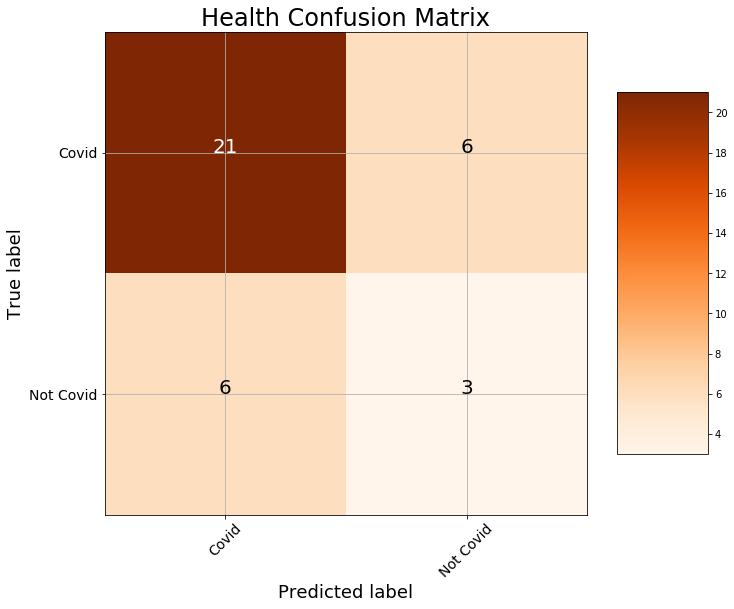

In [119]:
# Probabilities for each class
rf_probs = model.predict_proba(X_test_scaled)[:, 1]

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)
print()
print("ROC curve value is: ", roc_value)

# Plotting confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Covid', 'Not Covid'],
                      title = 'Health Confusion Matrix')

plt.savefig('text-cmat2.png')

##### NOTE: you can make prediction using randomized_search_hyperparameter_model as well. 

In [120]:
y_pred = random_search_model.predict(X_test_scaled)

y_test = np.array(y_test).astype("int")
# y_test
print("Testing accuracy is: ", accuracy_score(y_test, y_pred))
print(print(classification_report(y_test, y_pred)))
pd.crosstab(y_test, y_pred)

Testing accuracy is:  0.75
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        27
           1       0.50      0.33      0.40         9

    accuracy                           0.75        36
   macro avg       0.65      0.61      0.62        36
weighted avg       0.73      0.75      0.73        36

None


col_0,0,1
row_0,,
0,24,3
1,6,3


# Spliting data into training, validation and testing.
# and trying XGBoost 

In [121]:
X_train, X_test, y_train, y_test = train_test_split(df5, target_labels, test_size=0.20, random_state=20, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=20, shuffle=True)

# doing over sampling
X_train_smote , y_train_smote = smote.fit_sample(X_train.astype("int"), y_train.astype("int"))
print("Before Smote: ", Counter(y_train))
print("After Smote: ", Counter(y_train_smote))


# Normalising train, val and test data
np.random.seed(1)
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train_smote)
X_val_scaled = min_max_scaler.fit_transform(X_val)
X_test_scaled = min_max_scaler.fit_transform(X_test)

Before Smote:  Counter({0: 51, 1: 14})
After Smote:  Counter({0: 51, 1: 51})


In [122]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

## Hyper Parameter Optimization

params = {
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}


classifier=xgboost.XGBClassifier()

random_search=RandomizedSearchCV(classifier, param_distributions=params, n_iter=5,   
                                 scoring='roc_auc', n_jobs=-1, cv=5,verbose=3)

# n_iter defines how many times your hyperparamters combination will be tested. 

random_search_model = random_search.fit(X_train_scaled, y_train_smote)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.2s finished


In [123]:
# This shows best paramter for your model
random_search_model.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.25, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [124]:
# This is almost the same but less concise.
random_search_model.best_params_

{'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.25,
 'gamma': 0.0,
 'colsample_bytree': 0.4}

In [125]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3,
              learning_rate=0.25, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [126]:
classifier.fit(X_train_scaled, y_train_smote)

y_pred = classifier.predict(X_test_scaled)

y_test = np.array(y_test).astype("int")
# y_test
print("Testing accuracy is: ", accuracy_score(y_test, y_pred))
print(print(classification_report(y_test, y_pred)))
pd.crosstab(y_test, y_pred)

Testing accuracy is:  0.7916666666666666
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        18
           1       1.00      0.17      0.29         6

    accuracy                           0.79        24
   macro avg       0.89      0.58      0.58        24
weighted avg       0.84      0.79      0.73        24

None


col_0,0,1
row_0,,
0,18,0
1,5,1


# Naive Bayes

In [127]:
from sklearn.naive_bayes import GaussianNB

In [128]:
clf = GaussianNB()
clf.fit(X_train_scaled,y_train_smote)
print("Accuracy on test dataset: ", clf.score(X_test_scaled,y_test))

Accuracy on test dataset:  0.75


# SVM

In [129]:
from sklearn.svm import SVC

In [130]:
# with default hyper parameter
kernel = ["linear","poly","rbf","sigmoid"]
for i in kernel:
    clf = SVC(kernel = i)
    clf.fit(X_train_scaled,y_train_smote)
    pred = clf.predict(X_test_scaled)
    print("Accuracy on test dataset with",i,"kernel: ", accuracy_score(pred,y_test)) 

Accuracy on test dataset with linear kernel:  0.7916666666666666
Accuracy on test dataset with poly kernel:  0.75
Accuracy on test dataset with rbf kernel:  0.75
Accuracy on test dataset with sigmoid kernel:  0.7083333333333334


In [131]:
# hyper parameters for SVC
kernel = ["linear","poly","rbf","sigmoid"]
degree = [2,3,4]
gammas = [0.001, 0.01, 0.1, 1, 10, 100]
# making C list  
C=[1, 10, 100, 200, 300, 1000]


In [132]:
# trying to fit the model with different hyperparameters to achieve the highest accuracy
accuracy_history = []
for i in kernel:
    for j in degree:
        for k in gammas:
            for l in C:
                clf = SVC(kernel = i,C=l, degree = j, gamma=k,random_state=0)
                clf.fit(X_train_scaled,y_train_smote)
                pred = clf.predict(X_test_scaled)
                accuracy = accuracy_score(pred,y_test)
                print("Accuracy on test dataset with",i,"kernel",j,"degree",k,"gamma",l,"C: ", accuracy)
                accuracy_history.append(accuracy)

Accuracy on test dataset with linear kernel 2 degree 0.001 gamma 1 C:  0.7916666666666666
Accuracy on test dataset with linear kernel 2 degree 0.001 gamma 10 C:  0.7083333333333334
Accuracy on test dataset with linear kernel 2 degree 0.001 gamma 100 C:  0.75
Accuracy on test dataset with linear kernel 2 degree 0.001 gamma 200 C:  0.75
Accuracy on test dataset with linear kernel 2 degree 0.001 gamma 300 C:  0.75
Accuracy on test dataset with linear kernel 2 degree 0.001 gamma 1000 C:  0.75
Accuracy on test dataset with linear kernel 2 degree 0.01 gamma 1 C:  0.7916666666666666
Accuracy on test dataset with linear kernel 2 degree 0.01 gamma 10 C:  0.7083333333333334
Accuracy on test dataset with linear kernel 2 degree 0.01 gamma 100 C:  0.75
Accuracy on test dataset with linear kernel 2 degree 0.01 gamma 200 C:  0.75
Accuracy on test dataset with linear kernel 2 degree 0.01 gamma 300 C:  0.75
Accuracy on test dataset with linear kernel 2 degree 0.01 gamma 1000 C:  0.75
Accuracy on test d

Accuracy on test dataset with poly kernel 2 degree 0.01 gamma 100 C:  0.7916666666666666
Accuracy on test dataset with poly kernel 2 degree 0.01 gamma 200 C:  0.75
Accuracy on test dataset with poly kernel 2 degree 0.01 gamma 300 C:  0.8333333333333334
Accuracy on test dataset with poly kernel 2 degree 0.01 gamma 1000 C:  0.8333333333333334
Accuracy on test dataset with poly kernel 2 degree 0.1 gamma 1 C:  0.7916666666666666
Accuracy on test dataset with poly kernel 2 degree 0.1 gamma 10 C:  0.8333333333333334
Accuracy on test dataset with poly kernel 2 degree 0.1 gamma 100 C:  0.8333333333333334
Accuracy on test dataset with poly kernel 2 degree 0.1 gamma 200 C:  0.8333333333333334
Accuracy on test dataset with poly kernel 2 degree 0.1 gamma 300 C:  0.7083333333333334
Accuracy on test dataset with poly kernel 2 degree 0.1 gamma 1000 C:  0.5
Accuracy on test dataset with poly kernel 2 degree 1 gamma 1 C:  0.8333333333333334
Accuracy on test dataset with poly kernel 2 degree 1 gamma 10 

Accuracy on test dataset with poly kernel 4 degree 100 gamma 100 C:  0.2916666666666667
Accuracy on test dataset with poly kernel 4 degree 100 gamma 200 C:  0.2916666666666667
Accuracy on test dataset with poly kernel 4 degree 100 gamma 300 C:  0.2916666666666667
Accuracy on test dataset with poly kernel 4 degree 100 gamma 1000 C:  0.2916666666666667
Accuracy on test dataset with rbf kernel 2 degree 0.001 gamma 1 C:  0.75
Accuracy on test dataset with rbf kernel 2 degree 0.001 gamma 10 C:  0.75
Accuracy on test dataset with rbf kernel 2 degree 0.001 gamma 100 C:  0.75
Accuracy on test dataset with rbf kernel 2 degree 0.001 gamma 200 C:  0.75
Accuracy on test dataset with rbf kernel 2 degree 0.001 gamma 300 C:  0.7916666666666666
Accuracy on test dataset with rbf kernel 2 degree 0.001 gamma 1000 C:  0.7916666666666666
Accuracy on test dataset with rbf kernel 2 degree 0.01 gamma 1 C:  0.75
Accuracy on test dataset with rbf kernel 2 degree 0.01 gamma 10 C:  0.75
Accuracy on test dataset w

Accuracy on test dataset with sigmoid kernel 2 degree 0.1 gamma 300 C:  0.75
Accuracy on test dataset with sigmoid kernel 2 degree 0.1 gamma 1000 C:  0.7083333333333334
Accuracy on test dataset with sigmoid kernel 2 degree 1 gamma 1 C:  0.5
Accuracy on test dataset with sigmoid kernel 2 degree 1 gamma 10 C:  0.4166666666666667
Accuracy on test dataset with sigmoid kernel 2 degree 1 gamma 100 C:  0.4166666666666667
Accuracy on test dataset with sigmoid kernel 2 degree 1 gamma 200 C:  0.4166666666666667
Accuracy on test dataset with sigmoid kernel 2 degree 1 gamma 300 C:  0.4166666666666667
Accuracy on test dataset with sigmoid kernel 2 degree 1 gamma 1000 C:  0.4166666666666667
Accuracy on test dataset with sigmoid kernel 2 degree 10 gamma 1 C:  0.5
Accuracy on test dataset with sigmoid kernel 2 degree 10 gamma 10 C:  0.4166666666666667
Accuracy on test dataset with sigmoid kernel 2 degree 10 gamma 100 C:  0.3333333333333333
Accuracy on test dataset with sigmoid kernel 2 degree 10 gamma

Following hyperparameters are doing the best, concluded from above history

In [133]:
clf = SVC(kernel = "poly", degree = 2, gamma = 0.1, C = 10,random_state=0)
clf.fit(X_train_scaled,y_train_smote)
pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(pred,y_test)
print("Accuracy on test dataset : ", accuracy)

Accuracy on test dataset :  0.8333333333333334


In [134]:
clf = SVC(kernel = "poly", degree = 2, gamma = 0.01, C = 200,random_state =0)
clf.fit(X_train_scaled,y_train_smote)
pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(pred,y_test)
print("Accuracy on test dataset : ", accuracy)

Accuracy on test dataset :  0.75


In [135]:
clf = SVC(kernel = "poly", degree = 2, gamma = 1, C = 1,random_state = 0)
clf.fit(X_train_scaled,y_train_smote)
pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(pred,y_test)
print("Accuracy on test dataset : ", accuracy)

Accuracy on test dataset :  0.8333333333333334


In [136]:
clf = SVC(kernel = "poly", degree = 2, gamma = 0.1, C = 200,random_state = 0)
clf.fit(X_train_scaled,y_train_smote)
pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(pred,y_test)
print("Accuracy on test dataset : ", accuracy)

Accuracy on test dataset :  0.8333333333333334


# DecisionTreeClassifier

In [137]:
from sklearn import tree

In [138]:
clf = tree.DecisionTreeClassifier(min_samples_split = 5,random_state = 0)
clf.fit(X_train_scaled,y_train_smote)
pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(pred,y_test)
print("Accuracy on test dataset : ", accuracy)

Accuracy on test dataset :  0.7916666666666666


# Random Forest

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(df5, target_labels, test_size=0.30, random_state=20, shuffle=True)

# doing oversampling on train data
X_train_smote , y_train_smote = smote.fit_sample(X_train.astype("int"), y_train.astype("int"))
print("Before Smote: ", Counter(y_train))
print("After Smote: ", Counter(y_train_smote))


# Normalising train and test data

min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train_smote)
X_test_scaled = min_max_scaler.fit_transform(X_test)

Before Smote:  Counter({0: 65, 1: 17})
After Smote:  Counter({0: 65, 1: 65})


In [144]:
clf.fit(X_train_scaled, y_train_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [145]:
print(clf.feature_importances_)

[9.60240839e-03 1.22662189e-01 8.11691889e-03 8.97209610e-02
 7.08962392e-02 1.78178078e-01 8.14585409e-02 1.36834442e-02
 4.10309977e-02 5.51568351e-02 0.00000000e+00 9.81050000e-03
 0.00000000e+00 9.26578956e-03 5.58334135e-03 4.16081002e-03
 1.77161784e-02 8.61984861e-03 1.00177760e-02 4.61735177e-05
 5.75016977e-03 4.03022781e-02 2.18220523e-01]


In [147]:
pred = clf.predict(X_test_scaled)

In [149]:
accuracy_score(y_test,pred)

0.6944444444444444